In [1]:
# ignore the Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
raw_data = pd.read_csv(r'C:\Users\zahaa\OneDrive\Desktop\Data Analysis\Data\Electric_Vehicle_Population_Data.csv')

In [3]:
raw_data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [4]:
raw_data.shape

(177866, 17)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [6]:
raw_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [7]:
raw_data = raw_data.dropna()

In [8]:
raw_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [9]:
raw_data = raw_data.rename(columns={'Make':'manufacture'})

In [10]:
raw_data['manufacture'].unique()

array(['TESLA', 'FORD', 'NISSAN', 'KIA', 'BMW', 'CHEVROLET', 'AUDI',
       'SMART', 'VOLKSWAGEN', 'TOYOTA', 'RIVIAN', 'JEEP', 'HYUNDAI',
       'FIAT', 'PORSCHE', 'CHRYSLER', 'HONDA', 'MITSUBISHI', 'LEXUS',
       'VOLVO', 'DODGE', 'MERCEDES-BENZ', 'SUBARU', 'JAGUAR', 'POLESTAR',
       'MINI', 'LUCID', 'LAND ROVER', 'CADILLAC', 'ALFA ROMEO', 'FISKER',
       'MAZDA', 'LINCOLN', 'GENESIS', 'TH!NK', 'GMC', 'BENTLEY',
       'AZURE DYNAMICS', 'WHEEGO ELECTRIC CARS', 'ROLLS ROYCE'],
      dtype=object)

Text(0, 0.5, 'manufacture')

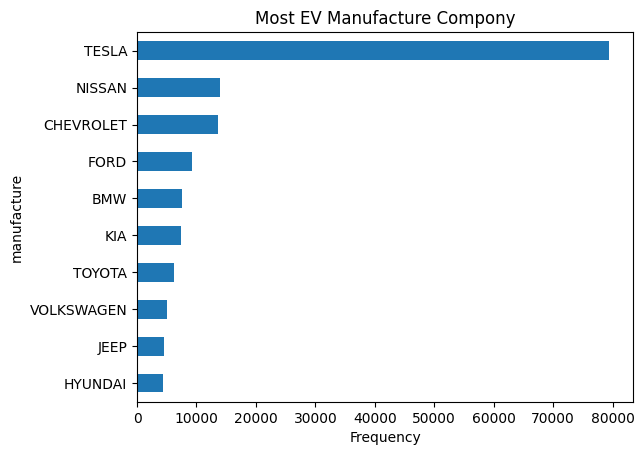

In [80]:
raw_data['manufacture'].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Most EV Manufacture Compony')
plt.xlabel('Frequency')
plt.ylabel('manufacture')

In [12]:
raw_data['Model Year'].unique()

array([2020, 2023, 2019, 2016, 2021, 2017, 2013, 2018, 2015, 2022, 2014,
       2012, 2024, 2011, 2000, 2008, 2010, 2002, 1998, 1999, 1997, 2003],
      dtype=int64)

In [13]:
raw_data['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: count, dtype: int64

In [14]:
raw_data

,VIN (1-10),County,City,State,Postal Code,Model Year,manufacture,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [15]:
raw_data = raw_data.rename(columns={'Electric Range':'Electric_Range'})

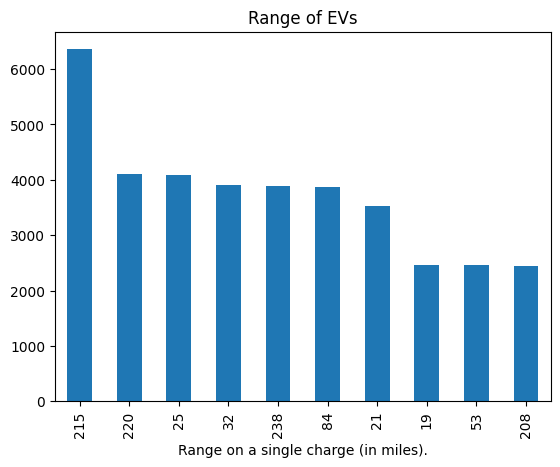

In [16]:
raw_data.loc[raw_data['Electric_Range'] != 0]['Electric_Range'].value_counts() \
    .head(10) \
    .plot(kind='bar')
plt.title('Range of EVs')
plt.xlabel('Range on a single charge (in miles).')
plt.show()

In [17]:
raw_data['Electric_Range'].value_counts()

Electric_Range
0      91790
215     6357
220     4100
25      4090
32      3900
       ...  
36         4
95         3
11         3
51         3
57         2
Name: count, Length: 102, dtype: int64

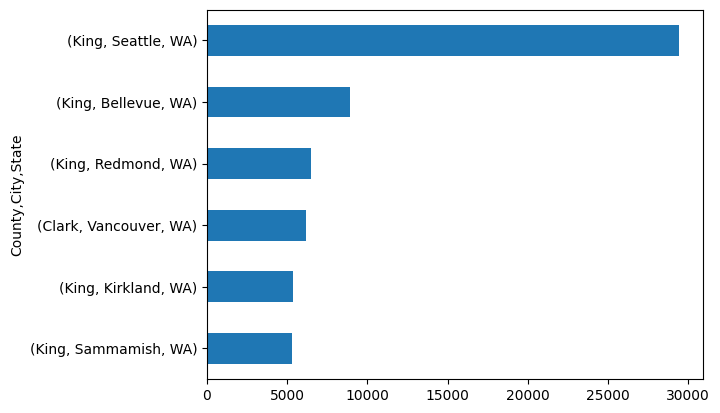

In [18]:
raw_data[['County','City','State']].value_counts().head(6).plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

In [19]:
raw_data.query('Electric_Range == 0')

,VIN (1-10),County,City,State,Postal Code,Model Year,manufacture,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric_Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
12,1G1FZ6S07M,Yakima,Yakima,WA,98908.0,2021,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,156686106,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
32,5YJ3E1EA5P,Thurston,Lacey,WA,98516.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,22.0,260749422,POINT (-122.7474291 47.0821119),PUGET SOUND ENERGY INC,5.306701e+10
33,KNDAEFS54R,Snohomish,Brier,WA,98036.0,2024,KIA,EV9,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,260657281,POINT (-122.316675 47.819365),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [20]:
len(raw_data) - len(raw_data.query('Electric_Range == 0'))

85683

In [21]:
raw_data

,VIN (1-10),County,City,State,Postal Code,Model Year,manufacture,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric_Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [22]:
raw_data['Model Year'].value_counts().head(6).sort_index(ascending=True)

Model Year
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
Name: count, dtype: int64

<Axes: xlabel='Model Year'>

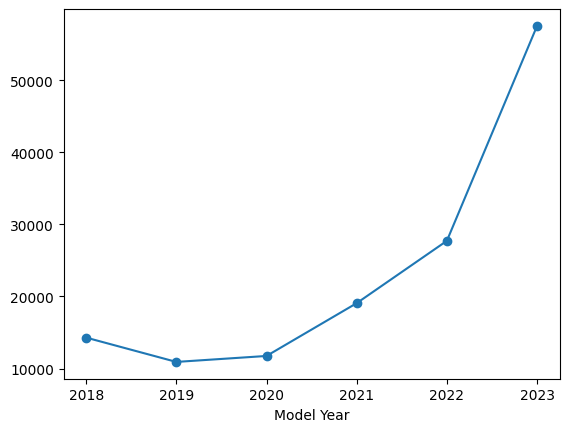

In [23]:
raw_data['Model Year'].value_counts().head(6).sort_index(ascending=True).plot(kind='line',marker='o', linestyle='-')

In [24]:
raw_data

,VIN (1-10),County,City,State,Postal Code,Model Year,manufacture,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric_Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [25]:
raw_data[['Model Year','Electric_Range']].value_counts()

Model Year  Electric_Range
2023        0                 50347
2022        0                 23394
2021        0                 14715
2018        215                6104
2019        220                4016
                              ...  
2017        59                    1
2003        95                    1
1998        58                    1
2022        15                    1
1997        39                    1
Name: count, Length: 309, dtype: int64

In [26]:
[['Electric_Range','Model Year']]

[['Electric_Range', 'Model Year']]

In [27]:
raw_data[raw_data['Electric_Range']!=0][['Model Year','Electric_Range']].value_counts() \
    .head(10) \
    .sort_index(ascending=False)
    

Model Year  Electric_Range
2023        32                1486
            21                1582
2020        322               1673
            291               2369
            266               1421
2019        220               4016
2018        215               6104
2017        238               1422
2015        84                1777
2013        75                1890
Name: count, dtype: int64

In [41]:
ev_county_distribution = raw_data['County'].value_counts()
top_county = ev_county_distribution.head(4).index

In [46]:
top_county_data = raw_data[raw_data['County'].isin(top_county)]
top_county_data

,VIN (1-10),County,City,State,Postal Code,Model Year,manufacture,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric_Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
7,KNAGV4LD9J,Snohomish,Bothell,WA,98012.0,2018,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29,0,1.0,290605598,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177858,5YJ3E1EB8N,Snohomish,Snohomish,WA,98296.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,213520422,POINT (-122.15134 47.8851158),PUGET SOUND ENERGY INC,5.306105e+10
177859,1N4BZ1DV7M,King,Redmond,WA,98053.0,2021,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,172798951,POINT (-122.0222799 47.6958998),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [62]:
top_city_by_distribution = top_county_data.groupby(['County', 'City']).size() \
    .sort_values(ascending=False) \
    .reset_index(name='Number of Vehicles') \
    .head(10) \
    #.plot(kind='bar')
top_city_by_distribution

,County,City,Number of Vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,Clark,Vancouver,6193
4,King,Kirkland,5362
5,King,Sammamish,5280
6,King,Renton,4980
7,Snohomish,Bothell,4663
8,Pierce,Tacoma,3722
9,King,Tukwila,2927


<Axes: xlabel='Number of Vehicles', ylabel='City'>

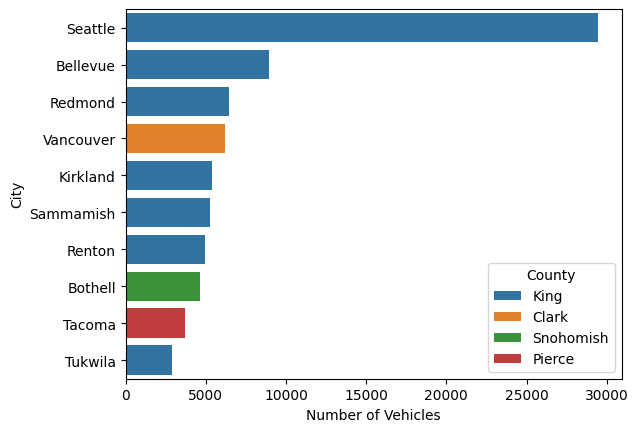

In [82]:
sns.barplot(x=top_city_by_distribution['Number of Vehicles'] \
            ,y=top_city_by_distribution['City'] \
            ,hue=top_city_by_distribution['County'])

In [47]:
top_county_data.groupby(['County', 'City']).size() \
    .sort_values(ascending=False) \
    .reset_index(name='Number of Vehicles')

,County,City,Number of Vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,Clark,Vancouver,6193
4,King,Kirkland,5362
...,...,...,...
118,Snohomish,Shoreline,1
119,Pierce,Kapowsin,1
120,King,Gold Bar,1
121,Pierce,Prairie Ridge,1


<Axes: ylabel='Electric Vehicle Type'>

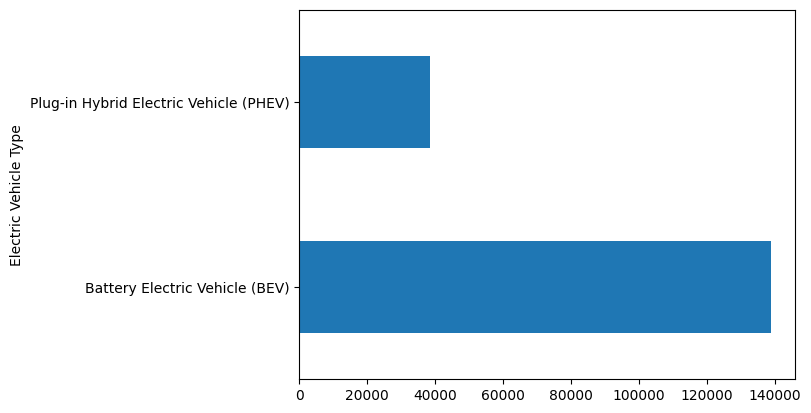

In [72]:
raw_data['Electric Vehicle Type'].value_counts().plot(kind='barh')

In [74]:
ev_type_data = raw_data['Electric Vehicle Type'].value_counts()
ev_type_data

Electric Vehicle Type
Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: count, dtype: int64

<Axes: ylabel='Electric Vehicle Type'>

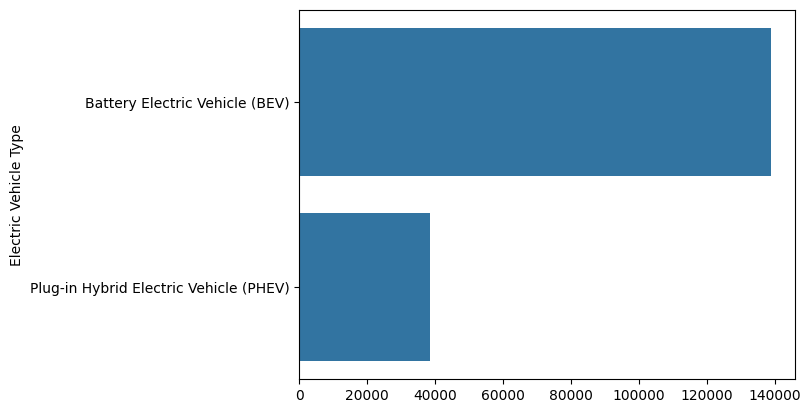

In [77]:
sns.barplot(x=ev_type_data.values,y=ev_type_data.index)

In [86]:
raw_data[['manufacture','Model']]

,manufacture,Model
0,TESLA,MODEL Y
1,TESLA,MODEL Y
2,TESLA,MODEL S
3,TESLA,MODEL S
4,TESLA,MODEL Y
...,...,...
177861,TESLA,MODEL Y
177862,HYUNDAI,KONA ELECTRIC
177863,TESLA,MODEL Y
177864,VOLKSWAGEN,ID.4


In [93]:
top_manufactures = raw_data['manufacture'].value_counts().head(4).index
top_manufactures

Index(['TESLA', 'NISSAN', 'CHEVROLET', 'FORD'], dtype='object', name='manufacture')

In [95]:
top_manufacture_data = raw_data[raw_data['manufacture'].isin(top_manufactures)]

In [97]:
ev_distribution_top_manufacture = top_manufacture_data.groupby(['manufacture','Model'])

In [120]:
top_models = ev_distribution_top_manufacture.head(10)
top_models

,VIN (1-10),County,City,State,Postal Code,Model Year,manufacture,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric_Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113688,1FTZR0816Y,Thurston,Olympia,WA,98506.0,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,22.0,8166497,POINT (-122.8874781 47.0519573),PUGET SOUND ENERGY INC,5.306701e+10
115432,1FTZR0813Y,Whatcom,Everson,WA,98247.0,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,42.0,8650316,POINT (-122.3582814 48.9098139),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10
118521,1FTZR0870Y,San Juan,Friday Harbor,WA,98250.0,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,40.0,221693048,POINT (-123.022255 48.531355),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,5.305596e+10
121373,1FTZR0812X,Skagit,Mount Vernon,WA,98274.0,1999,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,74,0,10.0,155686436,POINT (-122.322955 48.4152),PUGET SOUND ENERGY INC,5.305795e+10


In [118]:
top_manufactures_count = raw_data.groupby(['manufacture','Model']).size() \
    .sort_values(ascending=False) \
    .reset_index(name = 'Number of Vehicles')
top_models_count = top_manufactures_count.head(10)

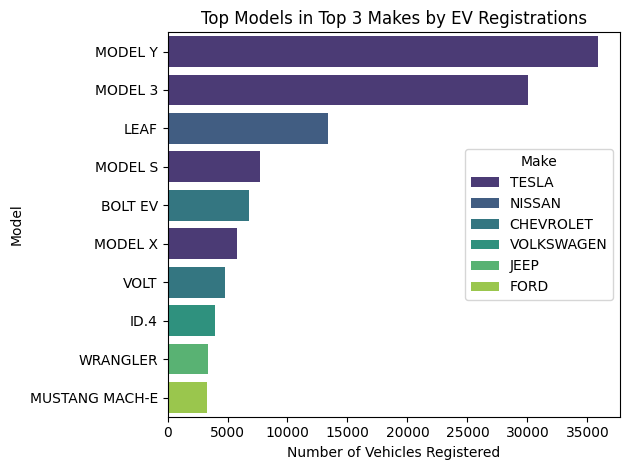

In [122]:
sns.barplot(x=top_models_count['Number of Vehicles'], \
            y=top_models_count['Model'],\
            hue=top_models_count['manufacture'],\
            palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

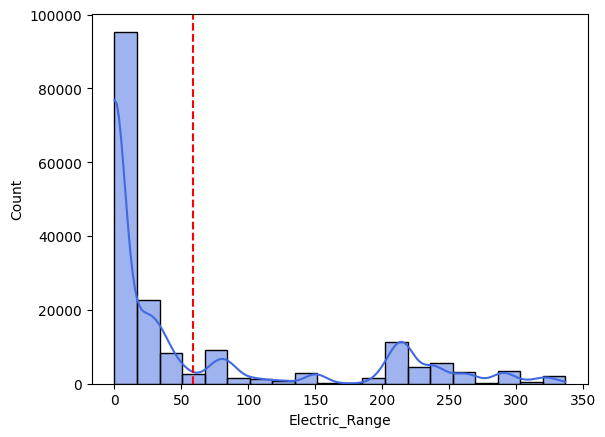

In [146]:
sns.histplot(raw_data['Electric_Range'],bins=20,kde=True,color='royalblue')
plt.axvline(raw_data['Electric_Range'].mean(),color='r',linestyle='--')
plt.show()

In [149]:
top_electric_Range_data = raw_data.loc[raw_data['Electric_Range'] != 0]

In [153]:
top_electric_Range_data['Electric_Range'].mean()

121.84592042762274

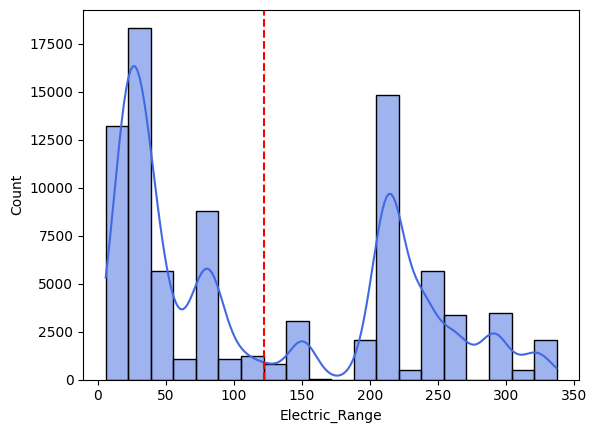

In [152]:
sns.histplot(top_electric_Range_data['Electric_Range'],bins=20,kde=True,color='royalblue')
plt.axvline(top_electric_Range_data['Electric_Range'].mean(),color='r',linestyle='--')
plt.show()

In [167]:
average_ev_range = raw_data.groupby('Model Year')['Electric_Range'].mean().reset_index()
average_ev_range

,Model Year,Electric_Range
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2003,95.000000
6,2008,220.000000
7,2010,226.086957
8,2011,70.891613
9,2012,61.172243


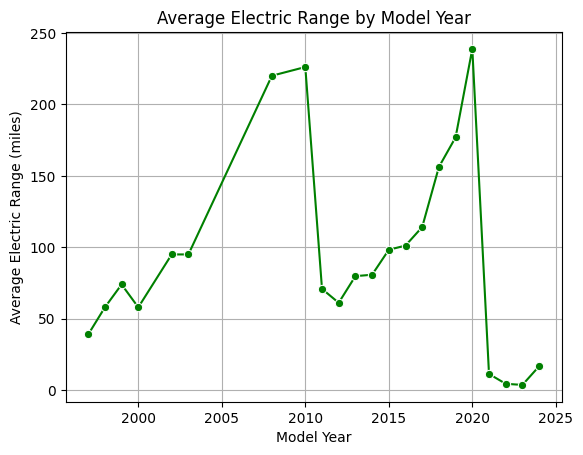

In [174]:
sns.lineplot(x=average_ev_range['Model Year'],y=average_ev_range['Electric_Range'],marker='o',c='g')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

In [175]:
raw_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'manufacture', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric_Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [189]:
top_manufacture_range = top_manufacture_data.groupby(['manufacture','Model'])['Electric_Range'].mean()\
    .sort_values(ascending=False) \
    .reset_index() \
    .head(10)
top_manufacture_range

,manufacture,Model,Electric_Range
0,TESLA,ROADSTER,234.673913
1,TESLA,MODEL S,176.794449
2,CHEVROLET,BOLT EV,154.857143
3,TESLA,MODEL X,137.192600
4,TESLA,MODEL 3,109.463028
5,NISSAN,LEAF,84.148742
6,CHEVROLET,SPARK,82.000000
7,FORD,FOCUS,78.987124
8,FORD,RANGER,64.153846
9,CHEVROLET,VOLT,45.365119


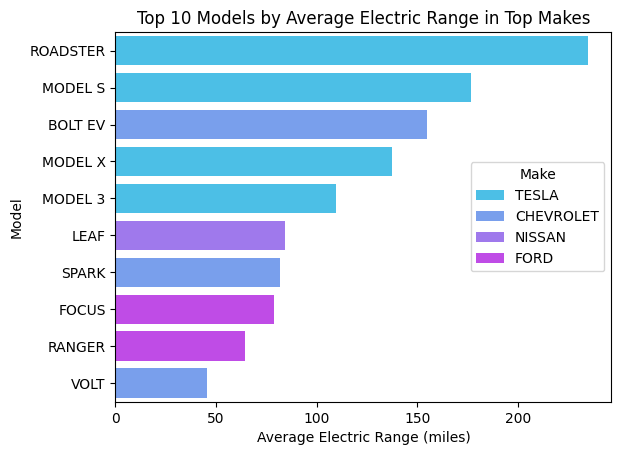

In [195]:
sns.barplot(data=top_manufacture_range,x='Electric_Range',y='Model',hue='manufacture',palette='cool')
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()